Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

In [2]:
import warnings
warnings.filterwarnings('ignore')

#Importing necessary libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud, ImageColorGenerator
from PIL import Image

Loading Data:

In [4]:
final_data = pd.read_csv('/content/end_data2.csv')
final_data = final_data.drop(['Unnamed: 0'],axis=1)
final_data.columns


Index(['Recipe_Name', 'Total_Time', 'Ingredients_List',
       'Number_of_Ingredients', 'Prep_Time', 'Cook_Time', 'Serves',
       'Level_of_Cooking', 'Course', 'Recipe_link', 'Recipe', 'Diet',
       'Appliances', 'Contains_Sugar', 'Veg/NonVeg', 'Contains_Nuts', 'Vegan',
       'Fruits_Present', 'Contains alcohol', 'Gluten Content', 'Quick_Recipe',
       'Seasonal', 'Cuisine_updated', 'Accompaniments', 'Jain/Non-Jain',
       'Regional'],
      dtype='object')

In [5]:
final_data.shape

(9624, 26)

#**Summary of the data:**

In [6]:
final_data.describe(include='object')

,Recipe_Name,Ingredients_List,Level_of_Cooking,Course,Recipe_link,Recipe,Diet,Appliances,Contains_Sugar,Veg/NonVeg,Vegan,Fruits_Present,Gluten Content,Seasonal,Cuisine_updated,Jain/Non-Jain,Regional
count,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624,9624
unique,9542,9608,3,18,9614,9602,7,124,2,2,2,152,2,4,48,2,6
top,Bread Halwa,'Mozzarella cheese 6-8 slices White bread sli...,Easy,Main Course,https://www.sanjeevkapoor.com/Recipe/Poha-Dhok...,"'', ''",High Protein Vegetarian,not required,No,Veg,No,No_Fruits,Low,Round the Year,Indian,Non-Jain,Across India
freq,2,2,8155,3397,2,9,4455,6574,8299,7376,7061,6803,8486,6602,2393,7160,6607


In [7]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9624 entries, 0 to 9623
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recipe_Name            9624 non-null   object 
 1   Total_Time             9624 non-null   float64
 2   Ingredients_List       9624 non-null   object 
 3   Number_of_Ingredients  9624 non-null   int64  
 4   Prep_Time              9624 non-null   float64
 5   Cook_Time              9624 non-null   float64
 6   Serves                 9624 non-null   int64  
 7   Level_of_Cooking       9624 non-null   object 
 8   Course                 9624 non-null   object 
 9   Recipe_link            9624 non-null   object 
 10  Recipe                 9624 non-null   object 
 11  Diet                   9624 non-null   object 
 12  Appliances             9624 non-null   object 
 13  Contains_Sugar         9624 non-null   object 
 14  Veg/NonVeg             9624 non-null   object 
 15  Cont

In [8]:
import re
import string
measures = ['teaspoon','cups','tablespoons','garnish','sliced','serve','to','required','as','for','is','in','tablespoon','teaspoon','cup','pinch','grams','gram','kg','kilo','kilos','kgs','roasted','fry','fried','ground','as required','spoon','to taste','squeeze','squeezed']
ingredients_updated = []
for i in final_data['Ingredients_List']:
  temp1=[]
  temp = re.sub('['+string.punctuation+']', '', str(i)).split()
  for j in temp:
    if j.lower() not in measures and j.isalpha()==True:
      temp1.append(j.lower())
  ingredients_updated.append(temp1)
#ingredients_updated

# **Plot of Diet vs. Region:**

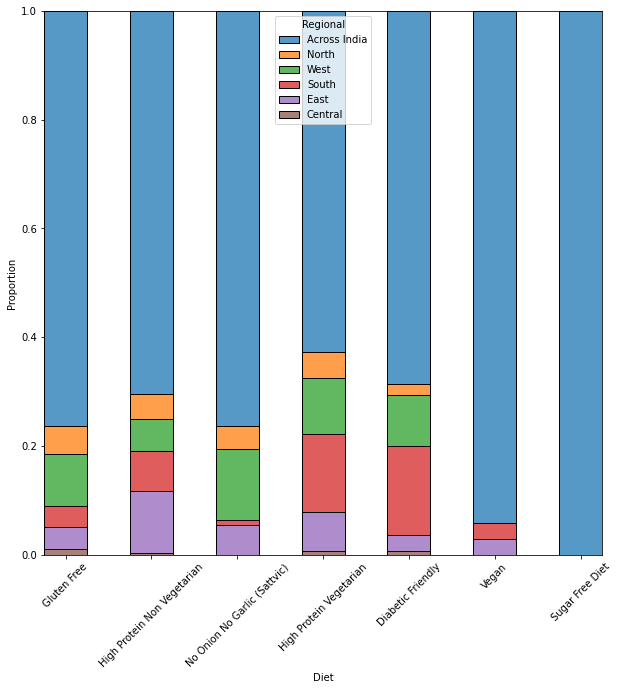

In [9]:
plt.figure(figsize = (10, 10), facecolor = None)

sns.histplot(data=final_data,
    x="Diet", hue="Regional",
    multiple="fill", stat="proportion",
    discrete=True, shrink=0.5)
plt.xticks(rotation=45)
plt.show()

# **Plot of Course vs. Level of Cooking:**

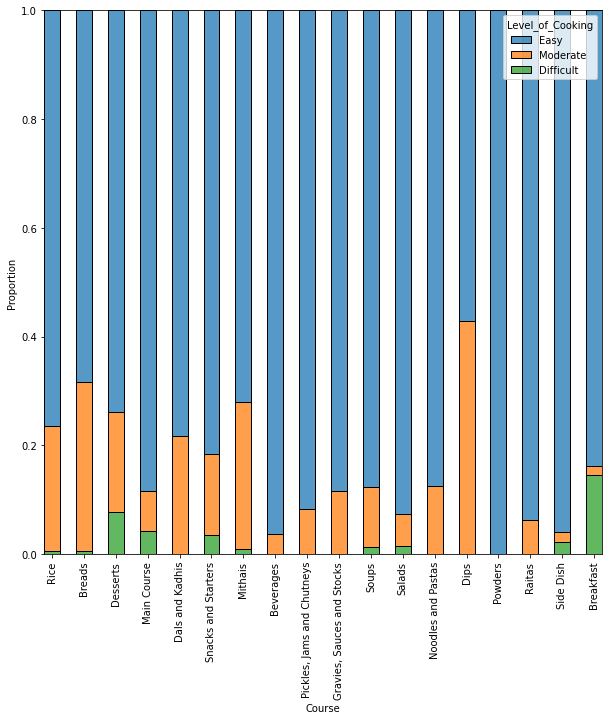

In [10]:
plt.figure(figsize = (10, 10), facecolor = None)

sns.histplot(data=final_data,
    x="Course", hue="Level_of_Cooking",
    multiple="fill", stat="proportion",
    discrete=True, shrink=0.5)
plt.xticks(rotation=90)
plt.show()

# **Plot of Veg/NonVeg vs. Region:**

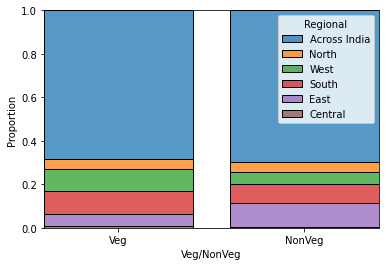

In [11]:
sns.histplot(data=final_data,
    x="Veg/NonVeg", hue="Regional",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8)
plt.show()

#**Total Time for Jain/NonJain:**

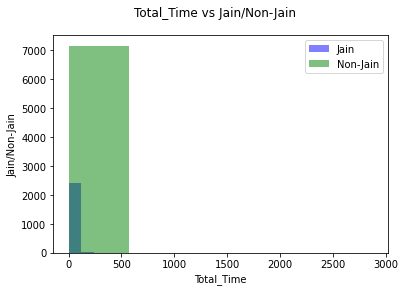

In [12]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data["Jain/Non-Jain"]=='Jain']["Cook_Time"], bins=5, alpha=0.5, color="blue", label="Jain")
ax.hist(final_data[final_data["Jain/Non-Jain"]=='Non-Jain']["Cook_Time"], bins=5, alpha=0.5, color="green", label="Non-Jain")

ax.set_xlabel("Total_Time")
ax.set_ylabel("Jain/Non-Jain")

fig.suptitle("Total_Time vs Jain/Non-Jain")

ax.legend();

# **Plot for Accompaniments:**

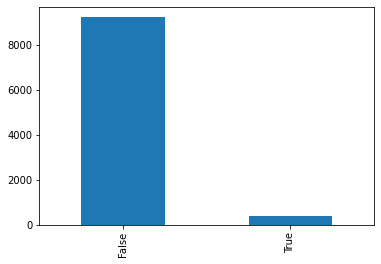

In [13]:
final_data['Accompaniments'].value_counts().plot(kind='bar')
plt.show()

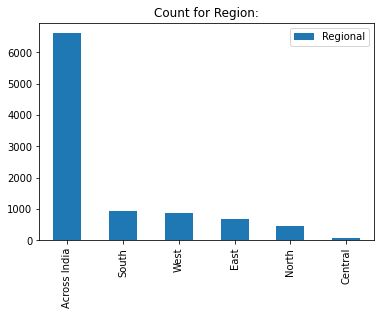

In [14]:
final_data['Regional'].value_counts().plot(kind = 'bar')
plt.legend()
plt.title('Count for Region:')
plt.show()

# **WordCloud for Recipe Instructions:**

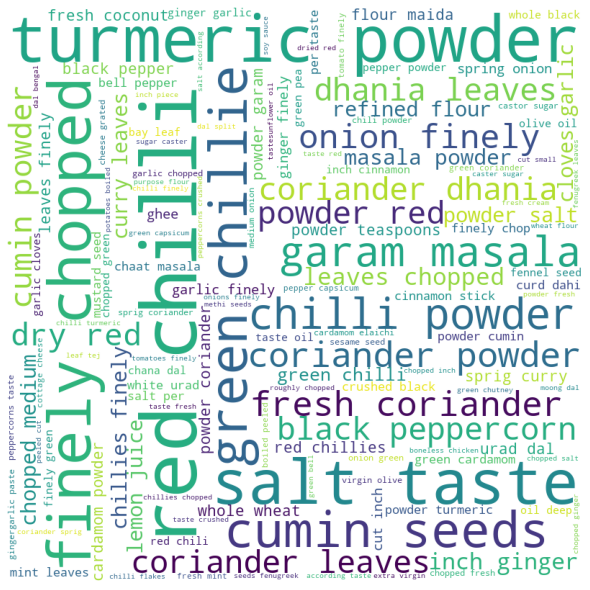

In [15]:
all_recipe_words = []
all_ing_words = ' '.join([' '.join(i) for i in ingredients_updated])
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
for i in final_data['Recipe']:
  temp = i.split(' ')
  for k in temp:
    if type(k)==str and k.isalpha() == True:
      all_recipe_words.append(k.lower())
all_recipe_words = ' '.join(all_recipe_words)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_ing_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# **WordCloud for Recipe Names:**

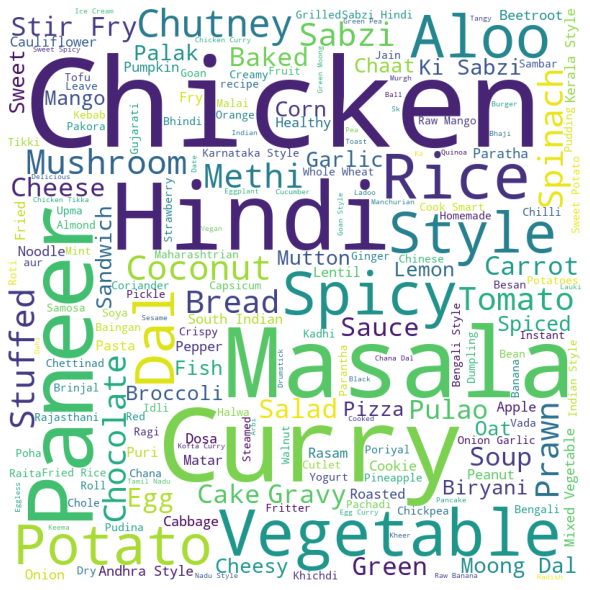

In [16]:
all_names_list = [i.split(' ') for i in final_data['Recipe_Name']]
all_names=[]
for i in all_names_list:
  for j in i:
    if 'Recipe' not in j:
      all_names.append(j)
all_names = ' '.join(all_names)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_names)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#**Scatter Plot for Serves and Cook Time:** 
*Hue = Veg/NonVeg*


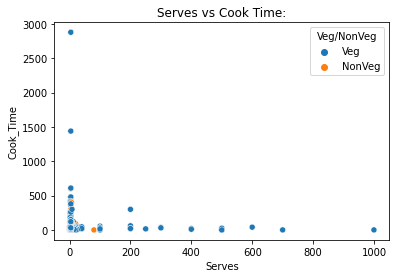

In [17]:
sns.scatterplot(final_data['Serves'],final_data['Cook_Time'], hue =final_data['Veg/NonVeg'], x_bins= [0,10,20,30])
plt.title('Serves vs Cook Time:')
plt.show()

# **No. of Recipes by Course:**

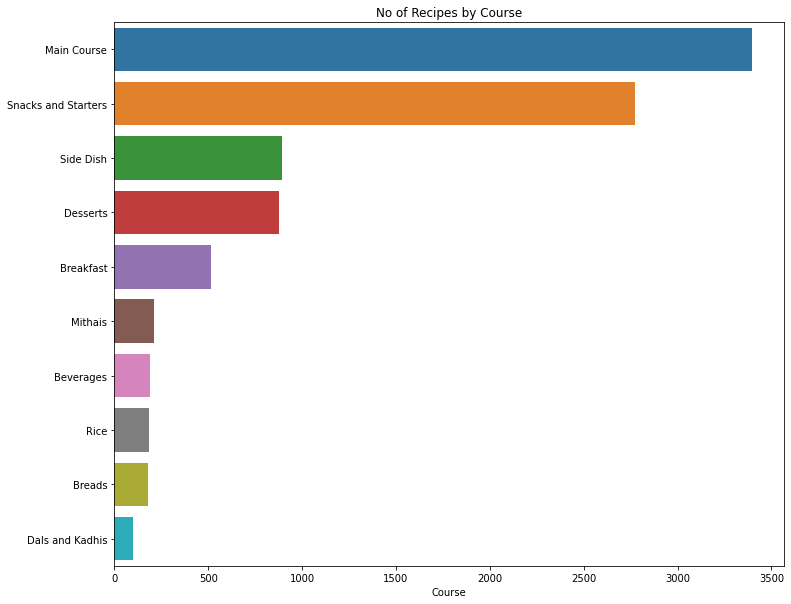

In [18]:
final_data.loc[final_data['Course']=='Dessert',['Course']]='Desserts'
ingredient_frequencies = final_data['Course'].value_counts()
top_50 = ingredient_frequencies.head(10)
plt.figure(figsize=(12,10))
plt.title("No of Recipes by Course")
sns.barplot(x=top_50,y=top_50.index)
plt.show()

#**No. of Unique Cuisines:**

In [19]:
final_data['Cuisine_updated'].unique()

array(['Indian', 'Indi-Fusion', 'Punjabi', 'Kashmiri',
       'Indi-Mediterranean', 'South Indian', 'Maharashtrian', 'Gujarati',
       'Kerala', 'Karnataka', 'Indo-Oriental', 'Tamil Nadu',
       'North Eastern', 'Sindhi', 'Rajasthani', 'Bengali', 'Parsi',
       'Gujrati', 'Goan', 'Moghlai', 'Uttar Pradesh', 'Andhra Pradesh',
       'Hyderabadi', 'Indo-italian', 'Madhya Pradesh', 'Mangalorean',
       'Oriya', 'Indo-Italian', 'Bihari', 'Chettinad', 'Marwari', 'Coorg',
       'Udupi', 'North Indian Recipes', 'Kerala Recipes',
       'Gujarati Recipes\ufeff', 'Lucknowi', 'Assam', 'Malabar',
       'Himachal', 'Awadhi', 'Nepalese', 'Konkan', 'Haryana',
       'Uttarakhand', 'Jharkhand', 'Nagaland', 'Gujarati Recipesï»¿'],
      dtype=object)

# **Average Number of Ingredients for Each Cuisine:**

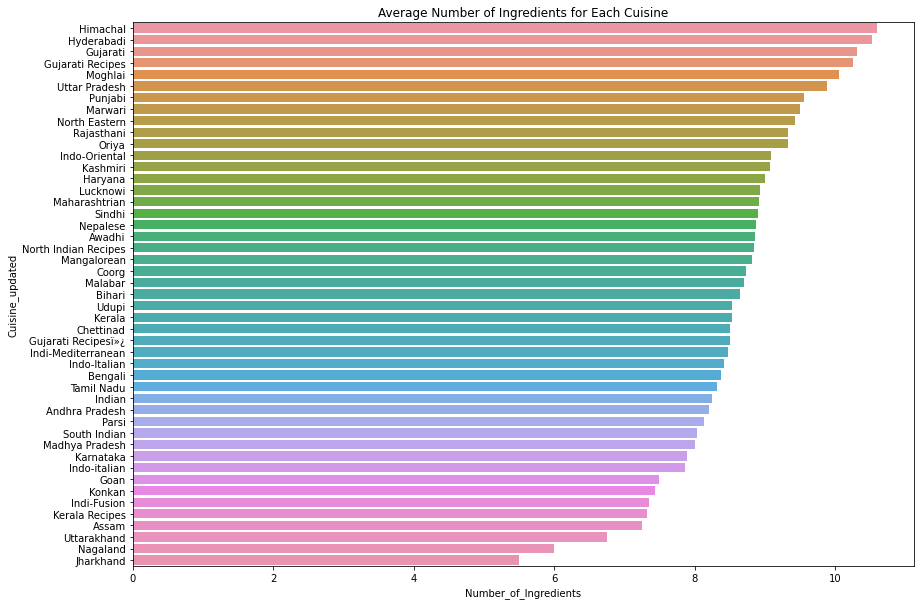

In [20]:
#final_data.Cuisine_updated  = remove_sc
#final_data.Cuisine_updated = final_data.Cuisine_updated.replace('Gujarati Recipes Ã¯Â»Â¿', 'Gujarati')
final_data.Cuisine_updated = final_data.Cuisine_updated.replace('Gujrati', 'Gujarati')

avg_ingr_count = final_data.groupby("Cuisine_updated")['Number_of_Ingredients'].mean()
avg_ingr_count = avg_ingr_count.sort_values(ascending=False)
plt.figure(figsize=(14,10))
plt.title("Average Number of Ingredients for Each Cuisine")
sns.barplot(x=avg_ingr_count,y=avg_ingr_count.index)
plt.show()

# **Histogram of the Number of Ingredients For All Recipes:**

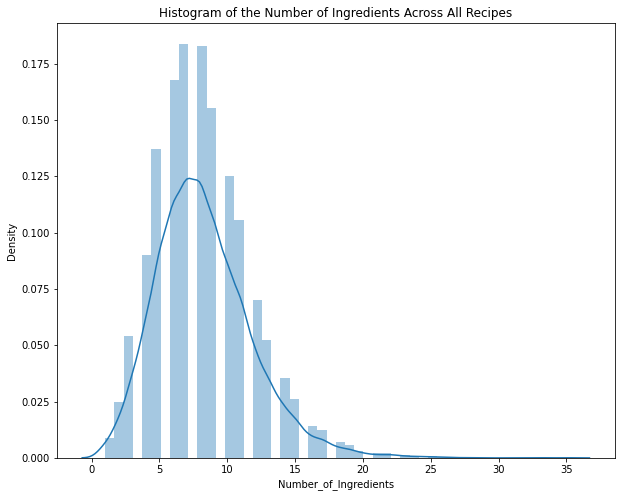

In [21]:
plt.figure(figsize=(10,8))
plt.title("Histogram of the Number of Ingredients Across All Recipes")
sns.distplot(final_data['Number_of_Ingredients'])
plt.show()

# **Total_Time Vs. Veg/NonVeg:**

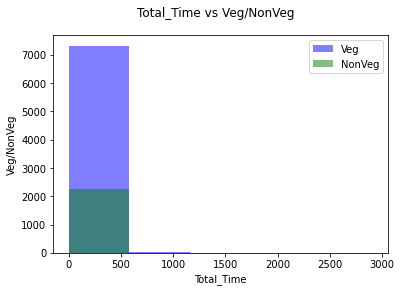

In [22]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data["Veg/NonVeg"]=='Veg']["Total_Time"], bins=5, alpha=0.5, color="blue", label="Veg")
ax.hist(final_data[final_data["Veg/NonVeg"]=='NonVeg']["Total_Time"], bins=5, alpha=0.5, color="green", label="NonVeg")

ax.set_xlabel("Total_Time")
ax.set_ylabel("Veg/NonVeg")

fig.suptitle("Total_Time vs Veg/NonVeg")

ax.legend();

In [23]:
final_data.to_json('/content/final_json_file.json')